<a href="https://colab.research.google.com/github/ElsiSahayaRenita/ECOMMERCE-CUSTOMER-SEGMENTATION/blob/main/ECommerceCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT LIBRARIES**

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [160]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
df =pd.read_csv("/content/drive/MyDrive/DATASETS/Ecommerce Customer segmentation.csv", encoding = 'unicode_escape')

In [162]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [163]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [164]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


# **Data Cleaning**
   Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, or duplicated


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   TotalPrice   541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [166]:
# converting the string to datetime format for InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



In [167]:
#checking the format has changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [168]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [169]:
#Dropping null values in Description
df=df.dropna(subset =["Description"])
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
TotalPrice          0
dtype: int64

# **Exploratory Data Analysis**
  Exploratory Data Analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

Text(0, 0.5, 'Total Count')

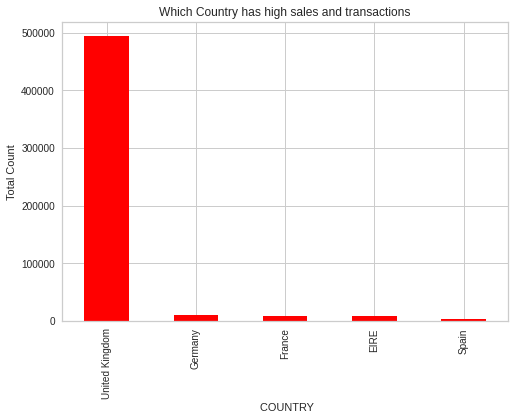

In [170]:
#categorise the country based on high sales and transaction
df['Country'].value_counts().head().plot(kind='bar', color="red")
plt.title("Which Country has high sales and transactions")
plt.xlabel("  COUNTRY ")
plt.ylabel("Total Count")

In [171]:
print(df[['CustomerID','Country']].groupby('Country').count().sort_values("CustomerID",ascending = False))

                      CustomerID
Country                         
United Kingdom            361878
Germany                     9495
France                      8491
EIRE                        7485
Spain                       2533
Netherlands                 2371
Belgium                     2069
Switzerland                 1877
Portugal                    1480
Australia                   1259
Norway                      1086
Italy                        803
Channel Islands              758
Finland                      695
Cyprus                       622
Sweden                       462
Austria                      401
Denmark                      389
Japan                        358
Poland                       341
USA                          291
Israel                       250
Unspecified                  244
Singapore                    229
Iceland                      182
Canada                       151
Greece                       146
Malta                        127
United Ara

In [172]:
print(df[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))


                      InvoiceNo
Country                        
United Kingdom           494024
Germany                    9495
France                     8557
EIRE                       8196
Spain                      2533
Netherlands                2371
Belgium                    2069
Switzerland                2002
Portugal                   1519
Australia                  1259
Norway                     1086
Italy                       803
Channel Islands             758
Finland                     695
Cyprus                      622
Sweden                      462
Unspecified                 446
Austria                     401
Denmark                     389
Japan                       358
Poland                      341
Israel                      297
USA                         291
Hong Kong                   288
Singapore                   229
Iceland                     182
Canada                      151
Greece                      146
Malta                       127
United A

### **Inference**: 
    
    1. As per the plot the United Kingdom seems to largely dominated in both sales and transactions.
    2. United Kingdom seems to be the country with high invoices and Saudi Arabia is the one with ver lowest invoice.
    3. Total number of Customer ID in United Kingdom is higher and HongKong seems to be the most least country with zero Customer ID. 

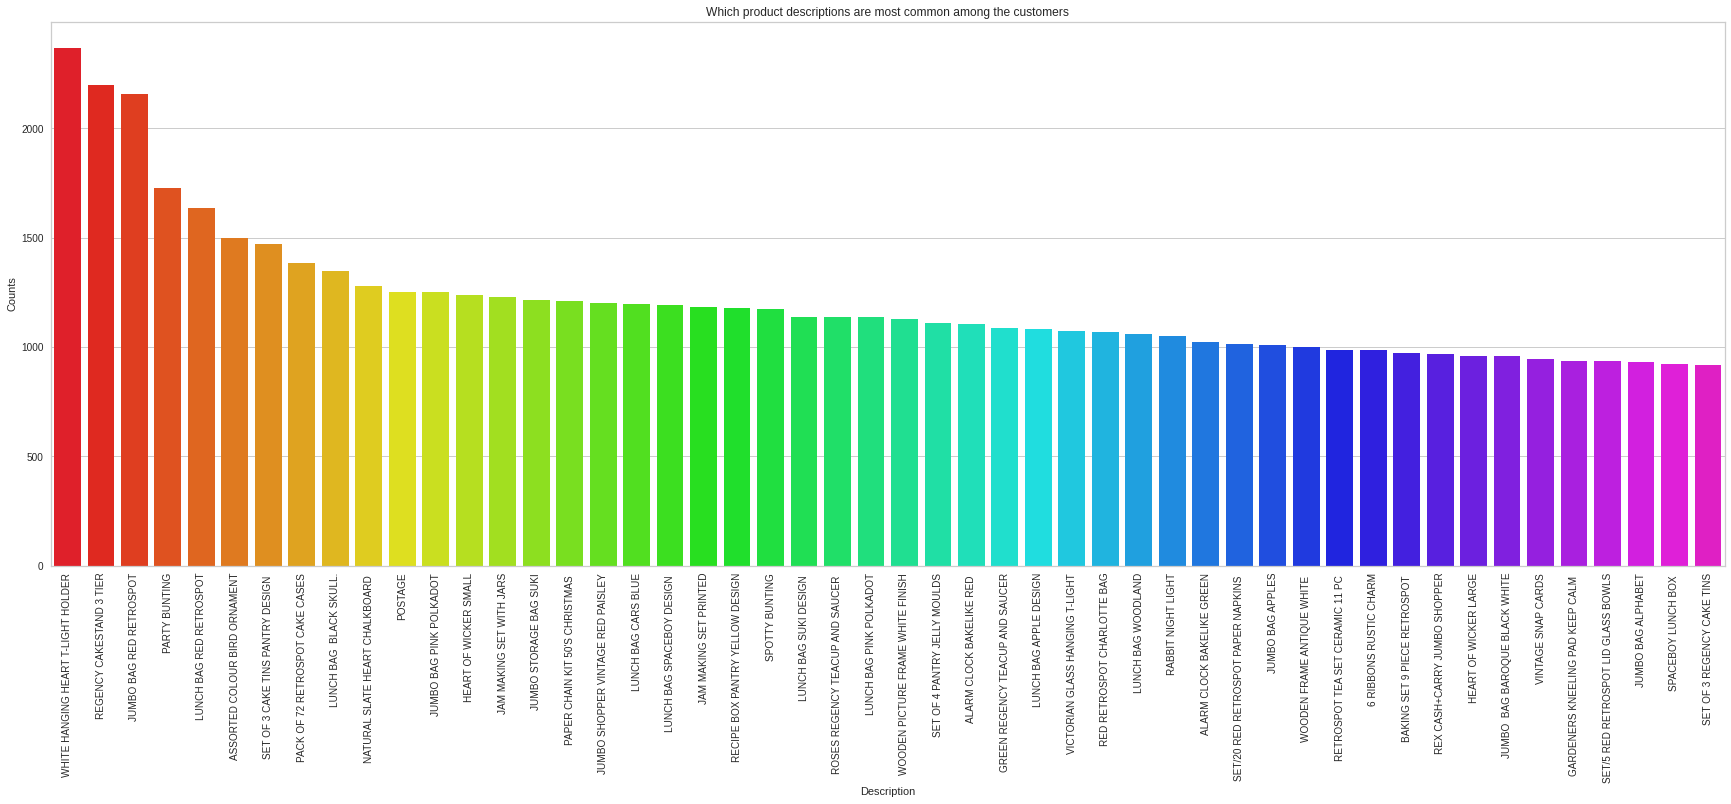

In [173]:
#Which product description has most common among customers
description = df.Description.value_counts().sort_values(ascending=False).iloc[0:50]
plt.figure(figsize=(30,10))
sns.barplot(x = description.index, y=description.values, palette="gist_rainbow")
plt.ylabel("Counts")
plt.xlabel("Description")
plt.title("Which product descriptions are most common among the customers")
plt.xticks(rotation=90);

In [174]:
products = df.Description.value_counts().head()
print("Most purchased products and its total count:/n", products)

Most purchased products and its total count:/n WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64


### **Inference**: 
    
    1. Mostly common product among the customers is White hang t-light holder, Regency cakestand tier and Jumbo bag red retrospot.
    2. Most of the description contains uppercase characters thus have to encoded to analysis the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


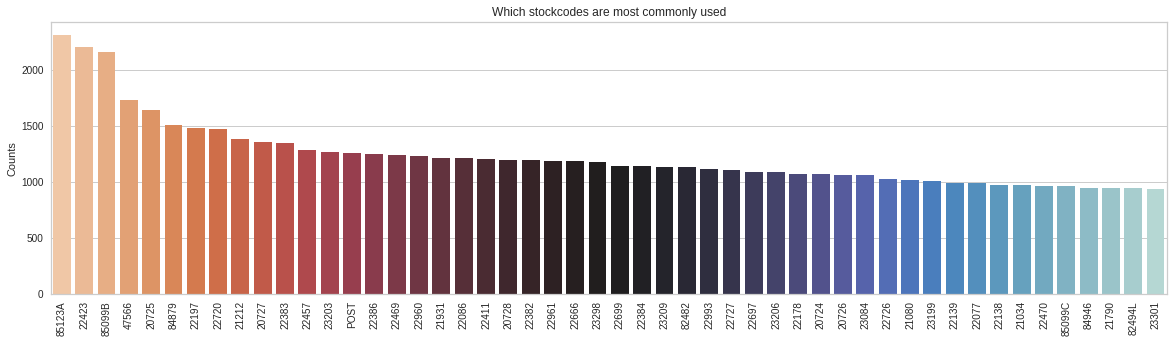

In [175]:
#The stockcode that has been most commonly used 
stock_counts = df.StockCode.value_counts().sort_values(ascending=False).iloc[0:50]
plt.figure(figsize=(20,5))
sns.barplot(stock_counts.index, stock_counts.values, palette='icefire_r')
plt.ylabel("Counts")
plt.title("Which stockcodes are most commonly used")
plt.xticks(rotation=90);


In [176]:
stock = df.StockCode.value_counts().head()
print("Most commonly used Stock code and its total count:")
print(stock)

Most commonly used Stock code and its total count:
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: StockCode, dtype: int64


### **Inference**: 
        
     1. Most commonly used stockcode is 85123A, 22423, 475966
     

In [177]:
Transaction_orders = df.groupby(["CustomerID"])["InvoiceNo"].count()
Transaction_orders= pd.DataFrame(Transaction_orders)
Transaction_orders.reset_index()
Transaction_orders.sort_values(by=["InvoiceNo"], ascending = False, inplace=True)
Transaction_orders.head(100)

,InvoiceNo
CustomerID,
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782
...,...
16558.0,474
18041.0,474
18069.0,472


### **Inference:**
    1. Customer transaction gives the details of each customer and their orders by gouping the Customer ID, Invoice No. 
    2. The customer id "17841" whose total invoice is about 7983, the one who has made higher times of transactions and orders.

In [178]:

## invoice no 
length_invoiceno=df.InvoiceNo.str.len()
print("Length of Invoice No:\n",length_invoiceno.value_counts(sort=True)\
      .reset_index(name='rows').rename(columns={'index':'length of InvoiceNo'}))
## invoice no with first letter as C for all invoice where length is 7 
first_letter=df['InvoiceNo'].str[0]
#summary 
print("\nFirst letter of invoice no:\n",first_letter.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'invoice first letter'}))
print("\n table for first letter of invoice_no against invoice_no length:\n"\
      ,pd.crosstab(first_letter,length_invoiceno,margins=True))

Length of Invoice No:
    length of InvoiceNo    rows
0                    6  531164
1                    7    9291

First letter of invoice no:
   invoice first letter  no_rows
0                    5   531164
1                    C     9288
2                    A        3

 table for first letter of invoice_no against invoice_no length:
 InvoiceNo       6     7     All
InvoiceNo                      
5          531164     0  531164
A               0     3       3
C               0  9288    9288
All        531164  9291  540455


### **Inference**:
    
    1. Invoice no with first letter 'C' represent the orders that have been canceled by the customers, but we cannot predict the reasons for why the customers cancelled those orders.
    2. Invoice no with first letter 'A' doesnot seems to have any specific significant towards data, also total count is 3 which is very less number to interrupt.

In [179]:
Total_purchased = df.groupby(["CustomerID"])["TotalPrice"].sum()
Total_purchased= pd.DataFrame(Total_purchased)
Total_purchased.reset_index()
Total_purchased.sort_values(by=["TotalPrice"], ascending = False, inplace=True)
Total_purchased.head(100)

,TotalPrice
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
...,...
17865.0,10158.54
17706.0,10097.37
12590.0,9861.38


### **Inference:**

      1. The total price is obtained by multiplying the unit price and quantity for each descriptions.
      2. From grouping Customer id and  Toatl price the customer id '14646' and total amount the customer spent is of '279489.02'.

Text(0.5, 1.0, ' Frequency of Order based on Years')

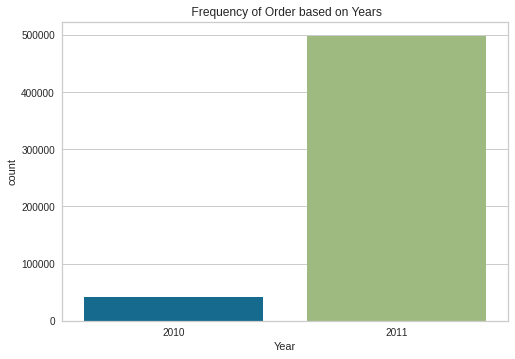

In [180]:
df["Year"] = df['InvoiceDate'].dt.year
sns.countplot(x= df.Year)
plt.title(" Frequency of Order based on Years")

### **Inference:**

      1. By using datetime grouping year and count plotting in which the year 2011 seems to have high purchasing compared to the year 2010.
      2. Total count of orders in the year 2010 will be approximately around 40,000 to 70,000. 

Text(0.5, 1.0, ' Frequency of Order based on Months')

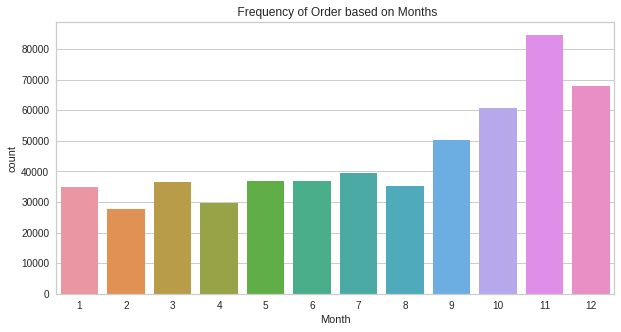

In [181]:
df["Month"] = df['InvoiceDate'].dt.month
plt.figure(figsize=(10,5))
sns.countplot(x= df.Month)
plt.title(" Frequency of Order based on Months")

### **Inference:**
         
         1. Similarly by using month we can analysis which month has been high order it seems to be 11 month of the year November.
         2. Feburary has low purchased month it may be due to number of days is less compared to other months.

Text(0.5, 1.0, ' Frequency of Order based on Days')

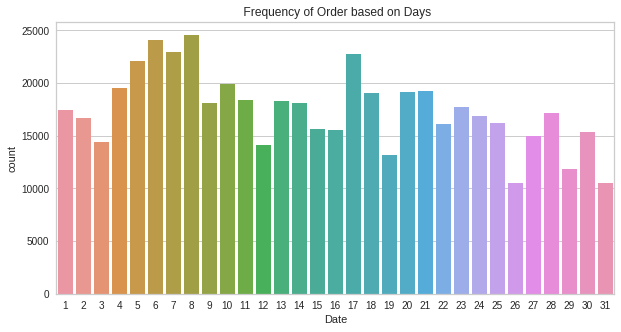

In [182]:
df["Date"] = df['InvoiceDate'].dt.day
plt.figure(figsize=(10,5))
sns.countplot(x= df.Date)
plt.title(" Frequency of Order based on Days")



### **Inference:**
              1. Every month first ten days has been high ordered, as customer may received their salary for the month.
              2. For every month 31 date means last day of the month been less ordered.

# **Encoding**
Encoding involves the use of a code to change original data into a form that can be used by an external process. 


# **LowerCasing**

Lowercasing is the most important process in text processing as it prevents duplication of same words having different casing.

In [183]:
df["Description_encoded"]  = df["Description"].str.lower()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Date,Description_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,white hanging heart t-light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,red woolly hottie white heart.


# **Removing Punctuations**
  punctuation are of no use in such tasks and so we remove them at the pre-processing step and  also to make our coding in clean manner.

In [184]:
df["Description_encoded"]  = df["Description_encoded"].str.replace(r'[^\w\s]+', '')
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Date,Description_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,white hanging heart tlight holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,red woolly hottie white heart


# **Removing numbers**
  As number has no specific significant with the products and it may cause discrepancy between same products.

In [185]:
df["Description"].head(19)

0      WHITE HANGING HEART T-LIGHT HOLDER
1                     WHITE METAL LANTERN
2          CREAM CUPID HEARTS COAT HANGER
3     KNITTED UNION FLAG HOT WATER BOTTLE
4          RED WOOLLY HOTTIE WHITE HEART.
5            SET 7 BABUSHKA NESTING BOXES
6       GLASS STAR FROSTED T-LIGHT HOLDER
7                  HAND WARMER UNION JACK
8               HAND WARMER RED POLKA DOT
9           ASSORTED COLOUR BIRD ORNAMENT
10             POPPY'S PLAYHOUSE BEDROOM 
11              POPPY'S PLAYHOUSE KITCHEN
12      FELTCRAFT PRINCESS CHARLOTTE DOLL
13                IVORY KNITTED MUG COSY 
14     BOX OF 6 ASSORTED COLOUR TEASPOONS
15          BOX OF VINTAGE JIGSAW BLOCKS 
16         BOX OF VINTAGE ALPHABET BLOCKS
17               HOME BUILDING BLOCK WORD
18               LOVE BUILDING BLOCK WORD
Name: Description, dtype: object

In [186]:
df['Description_encoded'] = df['Description_encoded'].str.replace('\d+', '')
df['Description_encoded'].head(19)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       white hanging heart tlight holder
1                     white metal lantern
2          cream cupid hearts coat hanger
3     knitted union flag hot water bottle
4           red woolly hottie white heart
5             set  babushka nesting boxes
6        glass star frosted tlight holder
7                  hand warmer union jack
8               hand warmer red polka dot
9           assorted colour bird ornament
10              poppys playhouse bedroom 
11               poppys playhouse kitchen
12      feltcraft princess charlotte doll
13                ivory knitted mug cosy 
14      box of  assorted colour teaspoons
15          box of vintage jigsaw blocks 
16         box of vintage alphabet blocks
17               home building block word
18               love building block word
Name: Description_encoded, dtype: object

## **Removing White Space**
 As the text may contain extra spaces between words which may increase the text size and not add any weightage to the data. While removing numbers also lead to extra white spaces. 

In [187]:
def remove_whitespace(text):
    return  " ".join(text.split())

df["Description_encoded"]  = df["Description_encoded"].apply(remove_whitespace)
df["Description_encoded"].head(19)

0       white hanging heart tlight holder
1                     white metal lantern
2          cream cupid hearts coat hanger
3     knitted union flag hot water bottle
4           red woolly hottie white heart
5              set babushka nesting boxes
6        glass star frosted tlight holder
7                  hand warmer union jack
8               hand warmer red polka dot
9           assorted colour bird ornament
10               poppys playhouse bedroom
11               poppys playhouse kitchen
12      feltcraft princess charlotte doll
13                 ivory knitted mug cosy
14       box of assorted colour teaspoons
15           box of vintage jigsaw blocks
16         box of vintage alphabet blocks
17               home building block word
18               love building block word
Name: Description_encoded, dtype: object

### **Removing Short words**
   Short words in data is insignificant  

In [188]:
df["Description_encoded"] = df["Description_encoded"].astype(str)

In [189]:
df["Description_encoded"] = df["Description_encoded"].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df["Description_encoded"]

0           white hanging heart tlight holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905             childrens apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Description_encoded, Length: 540455, dtype: object

# **Removing Stop words**
  Stop words has not provide any importance to data.Stopwords are trivial words like “I”, “the”, “you”, etc. that appear so frequently in the text that they may distort many NLP operations without adding much valuable information

In [190]:
#importing
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

en_stopwords = stopwords.words('english')

words = []
en_stopwords.extend(words)

def remove_stopwords(rev):
  
  text_token =word_tokenize(rev)
  token = " ".join( [x for x in text_token if x not in en_stopwords ])
  return token  
            
df["Description_encoded"] = [remove_stopwords(r) for r in df["Description_encoded"]]
df["Description_encoded"].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      white hanging heart tlight holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
Name: Description_encoded, dtype: object

# **Tokenization**
Tokenization is the process of exchanging sensitive data for nonsensitive data called "tokens" that can be used in a database or internal system without bringing it into scope.

In [191]:
#Tokenizaton
from nltk import word_tokenize
df['Description_encoded']=df['Description_encoded'].astype(str)
df['Description_encoded']=df['Description_encoded'].apply(lambda X: word_tokenize(X))


## **Lemmatization** **and  POS Tag**
   Lemmatization technique is like stemming. The output we will get after lemmatization is called ‘lemma’, which is a root word rather than root stem, the output of stemming. After lemmatization, we will be getting a valid word that means the same thing

In [192]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [193]:
df["Description_encoded"] = df["Description_encoded"].apply(lambda x: " ".join(lemmatization(x)))
df["Description_encoded"]


0           white hang heart tlight holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905          childrens apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: Description_encoded, Length: 540455, dtype: object

**Encoded Data**

In [194]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Date,Description_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,white hang heart tlight holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,cream cupid heart coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,knit union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,pack spaceboy napkin
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,childrens apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,childrens cutlery circus parade


## **Dropping Duplicates**
           Dropping duplicates to make the data better.

In [195]:
df_1 = df["Description_encoded"].drop_duplicates()
df_1 = pd.DataFrame(df_1)
df_1

,Description_encoded
0,white hang heart tlight holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet box
535329,mixed
537621,cream hang heart tlight holder


### **Inference:**
            
      After dropping dupplicates total number of rows is about 4032.
      Which means 4032 unique products are in this dataset.


# **Word Cloud**
Word Cloud is a visual representation of text data.

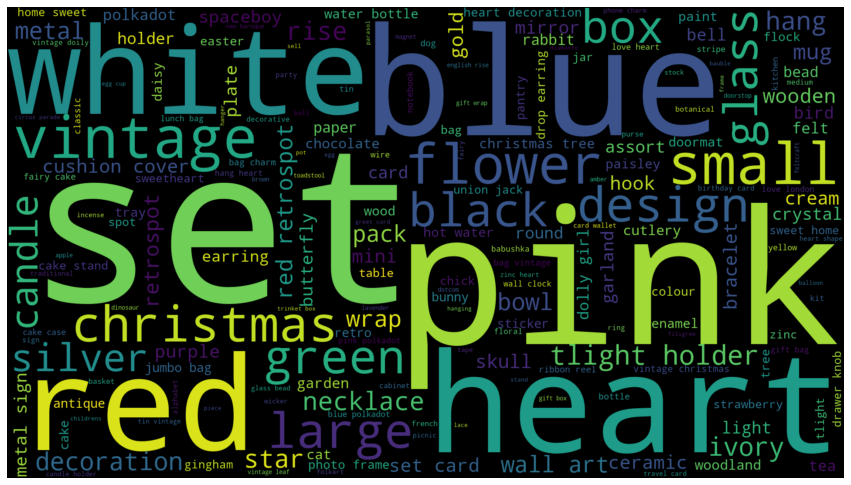

In [196]:
from wordcloud import WordCloud

text = " ".join(df_1.Description_encoded)
wordcloud = WordCloud(width =1920, height = 1080, max_font_size=500, background_color="Black").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



From the visual Representation of Description_encoded the words such as Set, Pink, Blue, Heart, White, Vintage which are seems to be the most frequently used in the product description.

# **Vectorization**
Vectorization is the act of converting data into a numerical format in such a way that a statistical model can interpret it and make predictions

# **COUNT VECTORIZER**
   CountVectorizer is just one of the methods to deal with textual data.

In [197]:
from sklearn.feature_extraction.text import CountVectorizer
# initialize the vectorizer
converter = CountVectorizer(binary = False)  
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in word_sack
word_sack = converter.fit_transform(df_1["Description_encoded"])
feature = converter.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [198]:
#into dataframe
df1 = pd.DataFrame(word_sack.toarray(), columns=feature)

df1

,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,xxcm,yellow,yellowblue,yelloworange,yellowpink,youre,yuletide,zero,zinc,zincglass
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After Vectorization the total number of rows is of 4032 and columns is about 1982.

# **K MEANS**
  K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

In [199]:
x=  word_sack.toarray()

x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Elbow Plot**
 Calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of k, and choose the k for which WSS first starts to diminish.

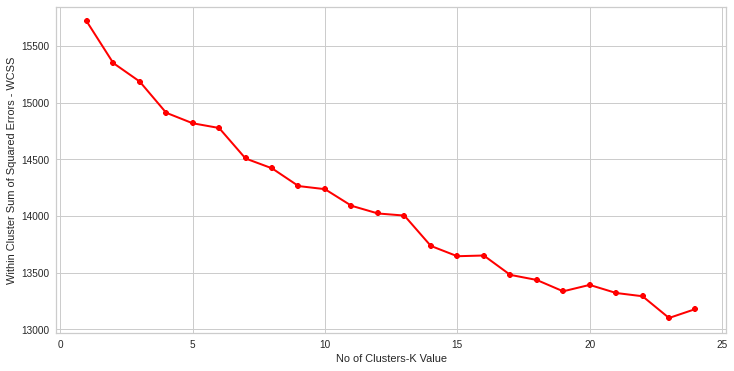

In [200]:
#plot between k value and within Cluster Sum of Squared Errors (WCSS)

wcss = []
for k in range(1,25):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


#plotting
plt.figure(figsize=(12,6))    

plt.plot(range(1,25),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("No of Clusters-K Value")
plt.ylabel("Within Cluster Sum of Squared Errors - WCSS")
plt.show()


### **Inference:**
      
      1. From the elbow plot as there is no location of a bend (knee) in the plot so we can't predict the indicator of the appropriate number of clusters.
      2. At k value 10 to 15 there is a slight bent curve.
      

## **Modelling**

In [201]:
Sc = StandardScaler()
sc_x = Sc.fit_transform(x)

In [202]:
components = None
pca = PCA(n_components = components)
pca.fit(sc_x)

PCA()

In [203]:
print('individual explained variance:', pca.explained_variance_ratio_*100)
print('cumulative explained variance:', pca.explained_variance_ratio_.cumsum()*100)

individual explained variance: [2.30311312e-01 2.22376111e-01 2.04367556e-01 ... 7.80509305e-35
 2.98982076e-35 4.02930850e-36]
cumulative explained variance: [  0.23031131   0.45268742   0.65705498 ... 100.         100.
 100.        ]


Text(0, 0.5, 'Explained variance')

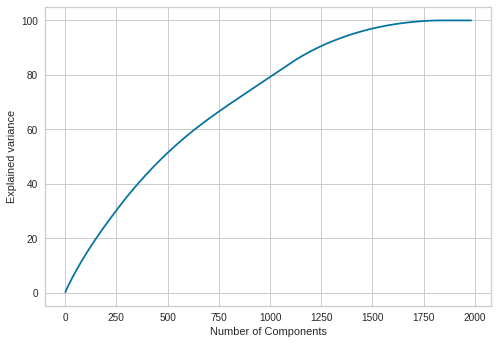

In [204]:

components = len(pca.explained_variance_ratio_) 
plt.plot(range(1, components+1), 
     np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of Components")
plt.ylabel("Explained variance")

### **Inference:**
 

      1. From the plot curve has been moderated in which number of component is  ranges about 1000 to 2000.
      2. We can approximately choose number of components according tho the plot.

In [205]:
pca = PCA(n_components = 1000)
df_pca = pca.fit_transform(x)


df_pca.shape

(4032, 1000)

In [ ]:
# Elbow plot
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,15)).fit(df_pca)
visualizer.show()

# **Inference:**
     K value occur from Elbow Plot is 8 that means 8 clusters are required to group the description.

# **k MEANS CLUSTERING**

In [206]:
#modelling
#applying cluster n = 8
kmeans = KMeans(n_clusters = 8) 
#fitting the data
kmeans = kmeans.fit(df_pca)
#measuring tightness of the group
inertias = kmeans.inertia_
#final centroid points
centroids = kmeans.cluster_centers_

print("inertia:",inertias)
print("centroids", centroids)

inertia: 13637.788420383462
centroids [[-1.15106740e-01 -1.23799981e-01 -2.87610106e-03 ... -1.27721911e-04
  -7.02669787e-04  7.36165185e-04]
 [ 1.48154674e-02 -7.37777696e-02 -5.30018922e-02 ...  2.29414000e-04
   5.12844441e-04 -9.50694160e-04]
 [-6.40603850e-02 -1.13974604e-01 -4.04578273e-02 ... -8.14418656e-07
   1.01628482e-06  2.68377783e-05]
 ...
 [-2.37954836e-01  2.35237998e-01  8.62908736e-01 ...  2.43115873e-04
  -9.12579572e-04  7.63855420e-04]
 [ 1.55768101e-01  8.03051564e-02 -3.52379088e-02 ...  5.90904302e-05
   5.55680610e-04 -2.25957723e-04]
 [-1.38040017e-01 -2.20817724e-02  9.76423522e-03 ... -8.75305394e-05
   4.47459079e-05  2.48766324e-05]]


In [ ]:
kmeans.labels_

In [ ]:
#label of clusters
label = kmeans.fit_predict(df_pca)
print(label)

In [ ]:
#total no in each clusters
df_pca['Clusters'] = label
df_pca['Clusters'].value_counts()

### **Visualize the Product Cluster Group**

In [ ]:
centroids = kmeans.cluster_centers_   # Getting the Centroids
u_labels = np.unique(label)      # Getting the labels
 
# plotting the results:
plt.figure(figsize=(10, 6)) 
for i in u_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 2] , label = i)
plt.scatter(centroids[:,0] , centroids[:,2] , marker="*", c="k", s=120, label="centroids")
plt.legend()
plt.show()

### **Inference:**
    1.  Total number of counts in each clusters in which cluster 5 has high count.
    2. cluster 4 has the least count of number 129 compared to other clusters.

### **Merging Product Clusters with given DataFrame**

In [ ]:
# creating a dataframe for the cluster labels:
dfc = pd.DataFrame(kmeans.labels_)
print(dfc.shape)
dfc

In [207]:
from pandas._libs.algos import diff_2d
df_1 = df_1.reset_index(drop=True)
df2 = df_1.join(dfc)  

df2.rename(columns={0:'Product Cluster'},inplace=True)

In [208]:
# merging the "product clusters" with the original dataframe:
df3 = pd.merge(df, df2, how='left', on='Description_encoded')
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Date,Description_encoded,Product Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,white hang heart tlight holder,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,white metal lantern,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,cream cupid heart coat hanger,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,knit union flag hot water bottle,7
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,red woolly hottie white heart,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,pack spaceboy napkin,5
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,childrens apron dolly girl,5
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,childrens cutlery dolly girl,5
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,childrens cutlery circus parade,5


## **Inference:**
         
          1. By Clustering we can grouped the customers based on Descriptions in groups.

# **Data Preprocessing**

**One Hot Encoding the Product Clusters**

In [209]:
df4 = pd.get_dummies(df3,columns=["Product Cluster"])
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,...,Date,Description_encoded,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Product Cluster_4,Product Cluster_5,Product Cluster_6,Product Cluster_7
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,...,1,white hang heart tlight holder,0,0,1,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,...,1,white metal lantern,1,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,...,1,cream cupid heart coat hanger,0,0,1,0,0,0,0,0


In [210]:
df5 =  df4.copy()
df5 = df5.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Description_encoded"],axis=1)
df5.head(3)

,Quantity,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Date,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Product Cluster_4,Product Cluster_5,Product Cluster_6,Product Cluster_7
0,6,2.55,17850.0,United Kingdom,15.30,2010,12,1,0,0,1,0,0,0,0,0
1,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,1,0,0,0,0,0,0,0
2,8,2.75,17850.0,United Kingdom,22.00,2010,12,1,0,0,1,0,0,0,0,0


### **OneHot Enoded Country Feature to group  Customers**

In [211]:
df6 = pd.get_dummies(df5,columns=["Country"])
df6.head(3)

,Quantity,UnitPrice,CustomerID,TotalPrice,Year,Month,Date,Product Cluster_0,Product Cluster_1,Product Cluster_2,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,17850.0,15.30,2010,12,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,17850.0,20.34,2010,12,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,17850.0,22.00,2010,12,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Label encoding "customerID"

In [212]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
 
df6['CustomerID']= le.fit_transform(df6['CustomerID'])
df6.head(3)

,Quantity,UnitPrice,CustomerID,TotalPrice,Year,Month,Date,Product Cluster_0,Product Cluster_1,Product Cluster_2,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,4048,15.30,2010,12,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,4048,20.34,2010,12,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,4048,22.00,2010,12,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [216]:
df7 = df6.groupby(['CustomerID']).mean()  #mean of the group
df7

,Quantity,UnitPrice,TotalPrice,Year,Month,Date,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.040000,0.000000,2011.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
1,13.505495,2.644011,23.681319,2010.829670,7.598901,15.818681,0.005495,0.126374,0.038462,0.203297,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,75.516129,5.764839,57.975484,2010.451613,8.290323,16.838710,0.000000,0.096774,0.064516,0.161290,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,8.643836,8.289041,24.076027,2011.000000,11.000000,21.000000,0.000000,0.191781,0.054795,0.287671,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,11.588235,3.841176,19.670588,2011.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.235294,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,7.714286,5.622857,11.545714,2011.000000,6.000000,12.000000,0.000000,0.285714,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
4369,7.538462,4.821538,13.584615,2011.000000,9.538462,4.153846,0.000000,0.076923,0.000000,0.153846,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
4370,1.847884,1.614987,2.771005,2011.000000,7.279101,18.222222,0.002646,0.056878,0.021164,0.128307,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000


In [217]:
df7.describe()

,Quantity,UnitPrice,TotalPrice,Year,Month,Date,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,...,4373.000000,4373.000000,4373.000000,4373.00000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000
mean,22.384653,7.978650,28.834896,2010.927622,7.537203,15.032056,0.026349,0.098704,0.075469,0.143133,...,0.000229,0.000229,0.000229,0.00678,0.001829,0.004669,0.000915,0.000457,0.903496,0.000915
std,213.233296,144.946736,127.309655,0.203846,2.703373,6.591036,0.062797,0.098849,0.103222,0.116221,...,0.015122,0.015122,0.015122,0.08158,0.042737,0.067689,0.030234,0.021383,0.295310,0.030234
min,-144.000000,0.000000,-4287.630000,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.461538,2.221642,10.946566,2011.000000,5.920000,10.602564,0.000000,0.028169,0.000000,0.074074,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.494048,2.944593,16.918444,2011.000000,7.660000,15.000000,0.000000,0.084639,0.044444,0.131579,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14.000000,3.898836,23.542857,2011.000000,9.877551,19.259259,0.031579,0.140845,0.107143,0.191329,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12540.000000,8055.780000,3861.000000,2011.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
# Converting into numpy array
y = df7.to_numpy()

# **Modelling**

In [221]:
sc = MinMaxScaler()
scaled_y = sc.fit_transform(y)

### Elbow plot

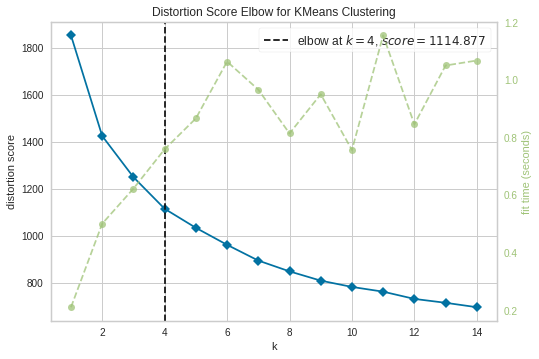

In [222]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=9)
visualizer = KElbowVisualizer(model, k=(1,15)).fit(scaled_y)
visualizer.show()

# **Inference:**
     Optimal K value from Elbow Plot is 4 that means 4 Cluster groups.

# **K MEANS CLUSTERING**

In [226]:
kmean = KMeans(n_clusters=4, init= "k-means++", random_state=9)     # applying k = 4
kmean.fit(scaled_y)          # fit the data

centroids = kmean.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",kmean.inertia_)  

inertia:  1114.8770875766152


In [227]:
kmean.labels_

array([0, 3, 3, ..., 0, 1, 1], dtype=int32)

In [228]:
label = kmean.fit_predict(scaled_y)

### **Visualize the Customer Cluster Group**

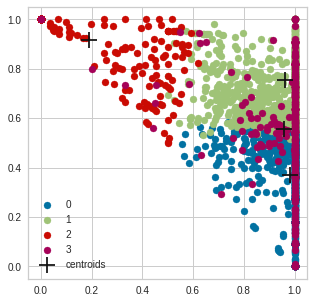

In [231]:
# Getting the Centroids and Cluster labels
centroids = kmean.cluster_centers_
labels = np.unique(label)

# 2D plotting
plt.figure(figsize=(5, 5)) 
for i in labels:
    plt.scatter(scaled_y[label == i , 3] , scaled_y[label == i , 4] , label = i)
plt.scatter(centroids[:,3] , centroids[:,4] , marker="+", c="k", s=250, label="centroids")
plt.legend()
plt.show()

# **Inference:**
    Cluster groups are not clearly formed. 
    Can't directly interpret with clusters groups.


## **Merging the Customer Cluster Group with CustomerID**

In [245]:
df8 = pd.DataFrame(kmean.labels_) 

df8.reset_index(level=0, inplace=True) 

df8.rename(columns={'index':'CustomerID', 0:'Customer Cluster'},inplace=True) 

df8.head()

,CustomerID,Customer Cluster
0,0,0
1,1,3
2,2,3
3,3,3
4,4,3


In [246]:
df9 = df8.groupby("Customer Cluster").count()
df9

,CustomerID
Customer Cluster,
0,1712
1,2007
2,242
3,412


**Plotting the Customer Cluster**

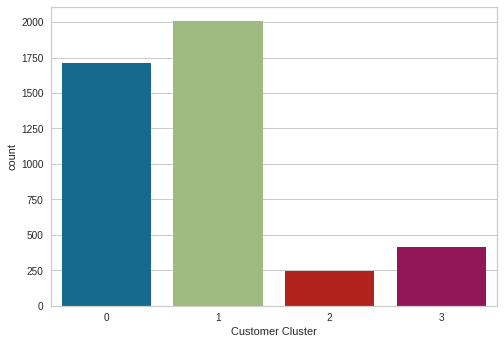

In [248]:
sns.countplot(x="Customer Cluster", data=df8)

## **Inference:**
    Cluster 1 has the high number of Customers followed by Cluster 0.
    Cluster 2 has the least number of Customers ranges below 250.

# **Silhouette score:**

# **Analysis of Silhouette Score:**
    1. +1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.
    2. 0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.
    3. -1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

In [251]:
silh_score = metrics.silhouette_score(scaled_y, kmean.labels_ )
silh_score

0.17856720433827966

# **Inference:**
    Silhouette Score Obtained is about 0.1785 that means Clusters are overlapped with each other.
    

# **INFERENCE:**
    Descriptions are encoded under NLP Process and grouped Customers under Product Clusters where 8 Cluster groups are formed.
    Customers also grouped based on
       a. Quantity and Total Price of Purchase.
       b. Date, Month and Year of Purchase.
       c. Country Orgin of the Customers.

    Customers are grouped under 4 Categories based on their Uniqueness. 
      



